In [1]:
from copy import deepcopy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Let's generate data and calulate the closed form of the linear regression
# so that we can compare with the results obtained by SGD
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X  + 3.2*X**2 + np.random.randn(1000, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [3]:
# prepare the data for training
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_train_processed = poly_scaler.fit_transform(X_train)
X_val_processed = poly_scaler.transform(X_val)

(0.0, 1000.0, 0.0, 2.0)

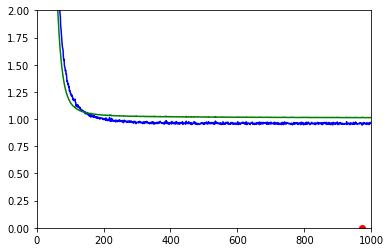

In [4]:
# Define and train model
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.00005)

min_err = float("inf")
best_epoch = None
best_model = None
val_errors = []
train_errors = []
for epoch in range(1000):
    sgd_reg.fit(X_train_processed, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_processed)
    y_train_predict = sgd_reg.predict(X_train_processed)
    val_error = mean_squared_error(y_val, y_val_predict)
    train_error = mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)
    if val_error < min_err:
        min_err = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
plt.plot(range(1000), val_errors, 'b-')
plt.plot(range(1000), train_errors, 'g-')
plt.plot(best_epoch, 0, 'ro')
plt.axis([0,1000, 0, 2])